## GOES 16 and 17

#### 1 Day (1 minute data)
GOES: Geostationary Operational Environmental Satellite X-Ray Sensor. 

Data from two Satellites (GOES 16 and 17) in two bands of wavelength 0.05-0.4 nm (SHORT) and 0.1-0.8 nm (LONG).

#### Flares classes: A, B, C, M and X [Watts/m²]

B: $I<10^{-6}$

C: $10^{-6}<=I<10^{-5}$

M: $10^{-5}<=I<10^{-4}$

X: $I>=10^{-4}$



A being the tiniest and X being the largest. Each category has nine subdivisions. These are logarithmic scales. 

In [1]:
import numpy as np
import pandas as pd
import math


In [2]:
goes_oneday = pd.read_json("xrays-1-day.json", orient="columns")
goes_oneday.head()

,time_tag,satellite,flux,observed_flux,electron_correction,electron_contaminaton,energy
0,2022-04-25T02:02:00Z,16,0.000001,0.000001,1.253398e-08,False,0.05-0.4nm
1,2022-04-25T02:02:00Z,16,0.000013,0.000013,4.346743e-08,False,0.1-0.8nm
2,2022-04-25T02:03:00Z,16,0.000001,0.000001,1.245440e-08,False,0.05-0.4nm
3,2022-04-25T02:03:00Z,16,0.000012,0.000012,4.343585e-08,False,0.1-0.8nm
4,2022-04-25T02:04:00Z,16,0.000001,0.000001,1.292649e-08,False,0.05-0.4nm


In [3]:
goes_oneday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2876 entries, 0 to 2875
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   time_tag               2876 non-null   object 
 1   satellite              2876 non-null   int64  
 2   flux                   2876 non-null   float64
 3   observed_flux          2876 non-null   float64
 4   electron_correction    2876 non-null   float64
 5   electron_contaminaton  2876 non-null   bool   
 6   energy                 2876 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(2)
memory usage: 137.7+ KB


$$ E=\frac{hc}{\lambda}$$

E: Photon Energy

$\lambda$: photon wavelength

c: Speed of light

h: Planck constant

In [4]:
# Wavelenght band (Energy)
goes_oneday['energy'].value_counts()

0.05-0.4nm    1438
0.1-0.8nm     1438
Name: energy, dtype: int64

In [5]:
# Electron Contamination
goes_oneday['electron_contaminaton'].value_counts()

False    2872
True        4
Name: electron_contaminaton, dtype: int64

In [6]:
# Satellite
goes_oneday['satellite'].value_counts()

16    2876
Name: satellite, dtype: int64

In [7]:
goes_oneday['time_tag']=pd.to_datetime(goes_oneday['time_tag'])
goes_oneday['time_tag'].head()

0   2022-04-25 02:02:00+00:00
1   2022-04-25 02:02:00+00:00
2   2022-04-25 02:03:00+00:00
3   2022-04-25 02:03:00+00:00
4   2022-04-25 02:04:00+00:00
Name: time_tag, dtype: datetime64[ns, UTC]

In [8]:
goes_oneday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2876 entries, 0 to 2875
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   time_tag               2876 non-null   datetime64[ns, UTC]
 1   satellite              2876 non-null   int64              
 2   flux                   2876 non-null   float64            
 3   observed_flux          2876 non-null   float64            
 4   electron_correction    2876 non-null   float64            
 5   electron_contaminaton  2876 non-null   bool               
 6   energy                 2876 non-null   object             
dtypes: bool(1), datetime64[ns, UTC](1), float64(3), int64(1), object(1)
memory usage: 137.7+ KB


<AxesSubplot:xlabel='time_tag'>

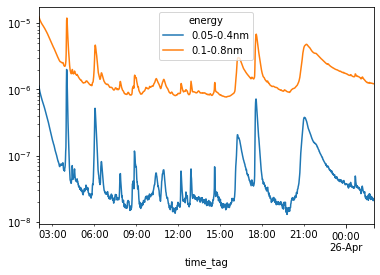

In [14]:
goes_oneday.pivot(index='time_tag', columns='energy', values='flux').plot(logy=True)

The two wavelenght band are kind of doing the same thing in the time. There are coherent oscillations dynamics in this data at least some of the time. Each wavelength band for the satellite 16 is not truly statistically independent. 